<a href="https://colab.research.google.com/github/Houda198/TP3_ATDN2/blob/main/TP3_ATDN2_HOUDA_SLIMANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partie 1 : Optimisation Bayésienne
Question 4 :

Saving tp3_atdn_donnees.csv to tp3_atdn_donnees (7).csv
   Humidité (%)  Température (°C)  pH du sol  Précipitations (mm) Type de sol  \
0     52.472407         27.454043   6.055399           179.770446    Limoneux   
1     87.042858         23.402409   7.125703           169.795469    Limoneux   
2     73.919637         17.738190   8.118838            56.410516    Limoneux   
3     65.919509         30.344875   7.696675           135.311957     Sableux   
4     39.361118         27.118279   7.919683           145.048905     Sableux   

   Rendement agricole (t/ha)  
0                   7.038885  
1                   7.712547  
2                   6.587578  
3                   7.907268  
4                   6.889830  


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [34.992941832153264, 89.57788776715802] before, using random point [28.686598641393772, 53.61342845543586]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [34.992941832153264, 89.57788776715802] before, using random point [28.44721140902957, 71.11027478085192]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [34.992941832153264, 89.57788776715802] before, using random point [31.612177314903008, 73.68120666911534]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [34.992941832153264, 89.57788776715802] before, using random point [15.37908796415968, 36.633423142969136]
  warn

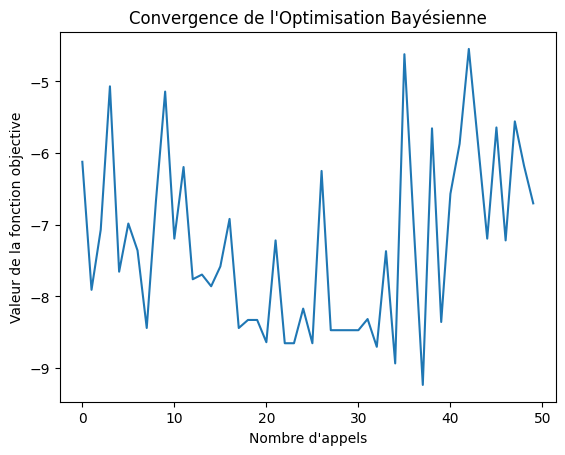

Meilleure température: 32.19034067178488
Meilleure humidité: 87.76869869975768


In [ ]:
# Importation des librairies nécessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install scikit-optimize
from skopt import gp_minimize
from skopt.space import Real
from google.colab import files

# Charger les données à partir d'un fichier CSVfrom google.colab import files

uploaded = files.upload()
# Lecture du fichier CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()
# Vérifier les premières lignes des données pour comprendre leur structure
print(df.head())

# Définir la fonction objective (rendement agricole en fonction de température et humidité)
def objective_function(params):
    temperature, humidity = params
    # Utilisation des données pour calculer le rendement correspondant
    # Exemple : calculer le rendement en trouvant la plus proche ligne dans le dataset
    closest_row = df.iloc[((df['Température (°C)'] - temperature)**2 + (df['Humidité (%)'] - humidity)**2).idxmin()]
    return -closest_row['Rendement agricole (t/ha)']  # Retourner la production négative pour minimiser l'objectif

# Définir l'espace de recherche pour l'optimisation
search_space = [Real(df['Température (°C)'].min(), df['Température (°C)'].max(), name='temperature'),
                Real(df['Humidité (%)'].min(), df['Humidité (%)'].max(), name='humidity')]

# Appliquer l'optimisation bayésienne avec gp_minimize
result = gp_minimize(objective_function, search_space, n_calls=50, random_state=42)

# Visualiser les résultats de l'optimisation
plt.plot(result.func_vals)
plt.title("Convergence de l'Optimisation Bayésienne")
plt.xlabel("Nombre d'appels")
plt.ylabel("Valeur de la fonction objective")
plt.show()

# Afficher les meilleurs paramètres trouvés
print(f"Meilleure température: {result.x[0]}")
print(f"Meilleure humidité: {result.x[1]}")


5. Optimisation des hyperparamètres d'un modèle de régression (Random Forest)


In [ ]:
# Importation des librairies nécessaires
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Séparer les données en caractéristiques (X) et cible (y)
X = df[['Humidité (%)', 'Température (°C)']]
y = df['Rendement agricole (t/ha)']

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir l'espace de recherche pour les hyperparamètres
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (3, 30),
    'min_samples_split': (2, 20)
}

# Appliquer l'optimisation bayésienne avec BayesSearchCV
opt = BayesSearchCV(RandomForestRegressor(), param_space, n_iter=50, cv=5, random_state=42)
opt.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print(f"Meilleurs hyperparamètres : {opt.best_params_}")

# Tester le modèle sur les données de test
y_pred = opt.predict(X_test)
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")


Meilleurs hyperparamètres : OrderedDict([('max_depth', 30), ('min_samples_split', 20), ('n_estimators', 403)])
RMSE : 0.9461556855561216


6. Visualisation de l'optimisation

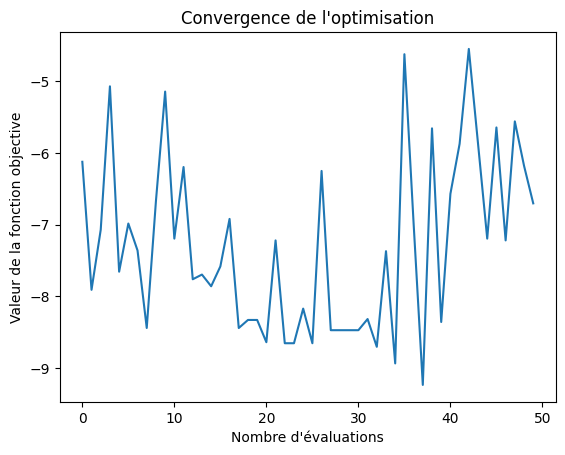

In [ ]:
# Visualisation de la convergence de l'optimisation
plt.plot(result.func_vals)
plt.title("Convergence de l'optimisation")
plt.xlabel("Nombre d'évaluations")
plt.ylabel("Valeur de la fonction objective")
plt.show()


Partie 2 : Modèles Bayésiens à Noyau
11. Implémentation d’une régression bayésienne à noyau

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

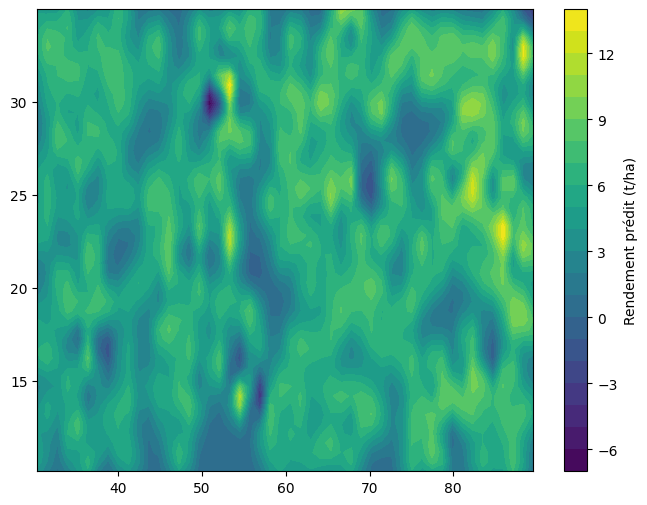

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Assurez-vous que X et y sont déjà définis comme les caractéristiques et les cibles
# Exemple d'initialisation de X et y avec des données factices :
# X = df[['Humidité (%)', 'Température (°C)']].values  # Assurez-vous que X est un tableau NumPy
# y = df['Rendement agricole'].values

# Définir le noyau du modèle
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))  # Choix du noyau (fonction de covariance)

# Créer l'instance du modèle de régression par processus gaussien
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Entraîner le modèle sur les données d'entraînement
gpr.fit(X_train, y_train)  # X_train et y_train sont vos données d'entraînement

# Utilisation de Pandas DataFrame avec .iloc
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)  # Accéder à la première colonne
y_ = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)  # Accéder à la deuxième colonne

xx, yy = np.meshgrid(x, y_)
grid = np.c_[xx.ravel(), yy.ravel()]

# Prédictions + écart-type
y_pred, sigma = gpr.predict(grid, return_std=True)

# Affichage
plt.figure(figsize=(8, 6))
cs = plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='viridis', levels=20)
plt.colorbar(cs, label='Rendement prédit (t/ha)')
plt.scatter(X_train[:, 0], X_train[:, 1], c='green', s=30, label='Données')
plt.title("Prédiction du rendement agricole (GP)")
plt.xlabel("Humidité (%)")
plt.ylabel("Température (°C)")
plt.legend()
plt.show()


12. Implémentation d’une classification bayésienne à noyau

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Encodage de la colonne "Type de sol"
le = LabelEncoder()
df['Type sol enc'] = le.fit_transform(df['Type de sol'])
# Sélection des features climatiques
X = df[['Humidité (%)', 'Température (°C)', 'pH du sol', 'Précipitations (mm)']].values
y = df['Type sol enc'].values
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
# Modèle bayésien avec noyau RBF
gpc = GaussianProcessClassifier(kernel=RBF(), random_state=42)
gpc.fit(X_train, y_train)
# Prédictions
y_pred = gpc.predict(X_test)
acc_gpc = accuracy_score(y_test, y_pred)
print(f"Précision du modèle bayésien à noyau : {acc_gpc:.2f}")

from sklearn.svm import SVC
# SVM standard avec RBF
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
# Prédictions
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Précision du SVM classique : {acc_svm:.2f}")

Précision du modèle bayésien à noyau : 0.34
Précision du SVM classique : 0.31


13. Analyse de l’incertitude dans les prédictions

In [ ]:
# Créer une grille de points pour prédire
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
y_ = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
xx, yy = np.meshgrid(x, y_)
grid = np.c_[xx.ravel(), yy.ravel()]
# Prédictions + écart-type
y_pred, sigma = gpr.predict(grid, return_std=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


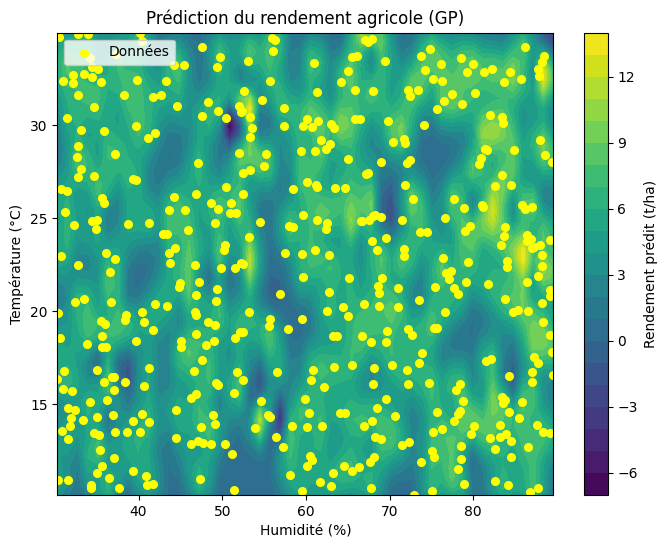

In [ ]:
# Affichage
plt.figure(figsize=(8, 6))
cs = plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='viridis', levels=20)
plt.colorbar(cs, label='Rendement prédit (t/ha)')
plt.scatter(X[:, 0], X[:, 1], c='yellow', s=30, label='Données')
plt.title("Prédiction du rendement agricole (GP)")
plt.xlabel("Humidité (%)")
plt.ylabel("Température (°C)")
plt.legend()
plt.show()

14. Test des différents noyaux

In [ ]:
# Tester différents noyaux dans un SVM pour la classification

# SVM avec noyau linéaire
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear:.2f}")

# SVM avec noyau RBF
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf:.2f}")

# SVM avec noyau polynomial
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with Polynomial Kernel: {accuracy_poly:.2f}")


ValueError: Expected 2D array, got 1D array instead:
array=[ 68.59729311  21.33222087   6.13198657 214.04045942  78.92768571
  25.55216751   5.5536218  265.69926939  34.27131891  10.63465889
   6.24169322 233.20038619  44.52331629  13.18950757   7.75814992
 284.23945576  84.45398844  13.01589678   8.48472347  67.35596069
  50.44821242  26.70212841   6.51100953 188.77123733  31.39631614
  26.47309855   7.04445206 177.09013673  43.67610975  25.45636929
   7.46572594  93.82573559  34.47303862  32.60396736   6.56386647
 205.96483117  76.62881496  25.01292151   6.99152429  72.15010742
  72.48435467  28.14298771   6.96827489 241.22081539  50.34178746
  12.87092062   5.6372261  141.88360557  53.35210072  30.43608904
   8.03251135 289.51837003  48.6589393   25.83502136   8.33419607
 296.94638005  31.09330954  16.76861683   6.04293086 103.37784158
  75.0368851   12.48603482   8.40946314 231.61542878  51.20113368
  12.28955183   7.5046384  214.23878907  66.45269111  30.32252523
   5.6110229  127.82692479  54.53717666  24.78188589   7.07920798
 123.86119437  84.32291859  16.48558584   7.25606309 131.73290408
  57.33940517  29.98539697   6.21263239 241.37822475  67.20795587
  27.36741177   6.61975537  89.72704192  83.40032051  27.34871111
   7.3544672   59.60658724  31.59067863  10.9137417    8.20210559
 238.76048219  76.2762208   13.67683702   6.65297994  55.90964651
  68.95261813  25.07880274   7.45369893 152.47622242  34.66407822
  13.42046577   6.89048213  67.23950409  71.51371186  24.89096852
   6.85416107  65.33740678  68.18462468  16.96475848   8.40730789
 130.84289053  32.76015852  22.45919432   8.42437949 252.94244702
  89.57788777  16.55660111   7.50278016 285.16981128  81.32763504
  32.87114753   6.09862735  82.02393659  35.09026285  16.85138052
   8.40973614  64.63773231  43.58974651  23.11278474   6.27941074
 251.48135003  73.91963651  17.73819041   8.11883751  56.41051645
  36.96435843  14.40967466   8.48900175 237.01829486  35.47720061
  19.4923102    8.10481384  87.22201258  76.33468616  22.84973723
   6.38892436 196.65211579  39.64848309  27.03756806   8.4913735
 212.5502731   51.4051996   10.36361664   6.75330035 118.70150889
  74.10426263  29.99790213   7.47020999  90.01790874  63.67663185
  18.64168208   7.03806553  76.02741235  84.06948063  22.38728291
   6.5993846   70.15037844  69.59904276  23.91907233   8.31168546
 265.50362057  86.93313224  23.88579264   5.86170066 118.15600018
  34.4426791   33.16469063   7.53894185 210.49287511  52.47240713
  27.45404285   6.05539879 179.77044628  88.19459113  20.45607591
   8.46300402 229.53076906  56.90673132  20.90316323   8.30981708
 230.51773455  47.52867891  34.24785995   8.27318859 137.90567181
  30.33132703  19.91356956   5.62627957 234.21843624  85.4816171
  14.27218968   7.39786568 210.24301934  43.32646863  32.38017094
   6.98762721 136.89288106  49.15881826  24.75737356   6.11752363
 126.40105387  67.98608744  16.06024331   7.36274655  86.59349804
  85.3124541   20.08707166   6.55213545 103.01120998  33.08872507
  29.72928097   8.05174519 245.50702192  55.91670112  34.68190323
   8.24646489 110.87057414  66.38574358  11.58437426   6.96592957
 159.87792216  51.50794371  22.30290733   6.15476166 201.77350902
  57.8219043   19.02434742   7.31034578 237.84377151  38.40504091
  16.2122285    6.43108588  74.5206452   46.79603382  19.95421734
   6.15764196 243.65844516  67.65348481  11.87844454   5.51727598
 170.74221802  36.95214357  16.45610971   8.34988355 186.67435318
  56.40914962  13.22898538   6.44587101 181.29084592  63.50425498
  26.62591686   7.35354172 105.15298818  48.70266457  12.8389398
   6.19887842 251.49813744  68.72833775  20.97837271   8.40458028
 141.93983772  54.75706061  31.3924117    5.72049024 150.37357897
  69.5216179   15.24763983   6.81584626 265.34249909  58.40830625
  26.5884343    6.88786887 158.01922074  68.99783585  28.05631421
   8.45998778 159.40078101  31.830015    13.83378508   6.69076983
  87.5422502   40.3976592   19.9750676    7.69476857 242.30578696
  73.56548002  20.60326678   7.62718156 137.42580744  51.56946907
  18.55204372   7.30006164 143.97207129  89.2132162   18.70638668
   6.36171697 162.94191968  59.55750626  19.57846321   8.29284609
 283.27833284  52.49223477  18.89181791   5.64463612 196.94234022
  89.13902725  20.79148866   7.35583413  71.91068669  49.85388149
  22.31545235   6.75274233 198.6190838   63.23125706  11.28564534
   7.7868554  157.41420318  60.7255835   12.00584364   7.39544058
 267.01417253  72.87575536  10.11580058   5.97863404  80.34660454
  37.17565476  13.47067932   8.32819532 223.10903783  50.46398106
  30.42680177   8.38897601 136.52493163  67.91023273  23.80117952
   7.09350858 162.15265774  31.5210446   13.11656703   7.14277713
 116.26160708  72.11801264  28.00091341   5.92748663 113.66765551
  71.80422992  26.79731859   6.67324461 268.33072897  32.58959472
  28.31430243   8.13554668 118.26770249  57.49517343  23.10975673
   7.36889975  94.35719237  87.29191684  23.43489007   8.42759577
 210.97606339  75.6906379   30.87325592   7.04678809 190.37114699
  32.71824059  34.9218563    6.61311629  99.36762246  73.7763707
  11.8965832    7.34023417 223.78613851  73.74043008  33.73801559
   6.7833194   73.92863888  72.37453363  12.94377707   6.10556036
 174.56392057  41.00427059  10.65917436   8.27574495  51.89071874].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.